In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../fiuba-trocafone-tp1-final-set/events.csv")

/home/juan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

In [19]:
df["timestamp"] = df.timestamp.astype(np.datetime64)

In [41]:
df["dayOfWeek"] = df.timestamp.transform(lambda x: x.dayofweek)

In [44]:
df["hour"] = df.timestamp.transform(lambda x: x.hour)

---

In [1]:
def generateSessions(df, timeDiff="10 min"):
    """
        Genera sesiones para el dataframe segun el tiempo entre interacciones
    """
    dfSorted = df.sort_values(by=["person", "timestamp"])[["person", "timestamp"]]
    nextEvents = dfSorted[["timestamp"]]                                                 
    nextEvents.index = nextEvents.index-1
    ev = nextEvents.loc[nextEvents.index[-1]]
    nextEvents.loc[nextEvents.index[-1]+1] = ev
    dfSorted = dfSorted.join(nextEvents.loc[0:], rsuffix="_next")
    dfSorted["timestamp_next"] = dfSorted.timestamp_next - dfSorted.timestamp 
    breakIndexes = (dfSorted.groupby("person")["timestamp"].count().cumsum()-1).values
    dfSorted.loc[breakIndexes, ["timestamp_next"]] = np.nan
    serSes = dfSorted.groupby("person")["timestamp_next"].transform(lambda x: x > pd.Timedelta(timeDiff))
    dfSorted["session_number"] = serSes
    dfSorted["session_number"] = dfSorted.groupby("person")["session_number"].transform(lambda x: x.cumsum())
    dfSorted = dfSorted.drop(["timestamp_next", "timestamp", "person"], axis=1)
    return dfSorted["session_number"]

In [4]:
df = pd.read_csv("../fiuba-trocafone-tp1-final-set/events.csv")

/home/juan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.timestamp = pd.to_datetime(df.timestamp)

In [5]:
dfSorted = df.sort_values(by=["person", "timestamp"])[["person", "timestamp"]]
nextEvents = dfSorted[["timestamp"]]                                                 
nextEvents.index = nextEvents.index-1
ev = nextEvents.loc[nextEvents.index[-1]]
nextEvents.loc[nextEvents.index[-1]+1] = ev
dfSorted = dfSorted.join(nextEvents.loc[0:], rsuffix="_next")

/home/juan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
dfSorted["timestamp_next"] = dfSorted.timestamp_next - dfSorted.timestamp 
breakIndexes = (dfSorted.groupby("person")["timestamp"].count().cumsum()-1).values
dfSorted.loc[breakIndexes, ["timestamp_next"]] = np.nan

In [14]:
secs= dfSorted.timestamp_next.dt.seconds

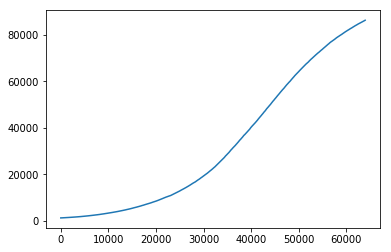

In [28]:
secs[secs>1200].sort_values().plot(y="timestamp_next", use_index=False)

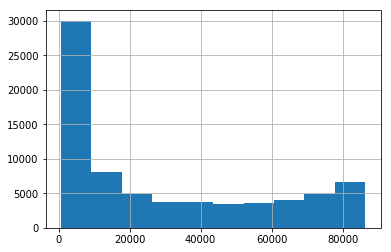

In [43]:
secs[secs>600].hist()

In [19]:
timeDiff = "20 min"
serSes = dfSorted.groupby("person")["timestamp_next"].transform(lambda x: x > pd.Timedelta(timeDiff))


In [20]:
dfSorted["session_number"] = serSes
dfSorted["session_number"] = dfSorted.groupby("person")["session_number"].transform(lambda x: x.cumsum())

In [29]:
dp = dfSorted[dfSorted.person == "000a54b2"]

In [39]:
dfSorted.groupby(["person"]).session_number.shift(1).fillna(0)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         1.0
16         1.0
17         1.0
18         1.0
19         1.0
20         1.0
21         1.0
22         1.0
23         1.0
24         1.0
25         1.0
26         1.0
27         1.0
28         1.0
29         1.0
          ... 
1011258    1.0
1011259    1.0
1011260    1.0
1011261    1.0
1011262    1.0
1011263    1.0
1011264    2.0
1011265    2.0
1011266    2.0
1011267    2.0
1011268    2.0
1011269    2.0
1011270    2.0
1011271    2.0
1011272    2.0
1011273    2.0
1011274    2.0
1011275    2.0
1011276    3.0
1011277    3.0
1011278    3.0
1011279    3.0
1011280    3.0
1011281    3.0
1011282    3.0
1011283    3.0
1011284    0.0
1011285    0.0
1011286    0.0
1011287    0.0
Name: session_number, Length: 1011288, dtype: float64

In [ ]:

dfSorted["session_number"] = serSes
dfSorted["session_number"] = dfSorted.groupby("person")["session_number"].transform(lambda x: x.cumsum())
dfSorted = dfSorted.drop(["timestamp_next", "timestamp", "person"], axis=1)
return dfSorted["session_number"]